In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor

raw_match = pd.read_csv('stats/aggregate/match_stats.csv')

In [2]:
drop_df = raw_match[raw_match['player_survive_time'] >= 1000000000 ].index
raw_match.drop(drop_df , inplace=True)
drop_df = raw_match[raw_match['player_kills'] >= 80 ].index
raw_match.drop(drop_df , inplace=True)
drop_df = raw_match[raw_match['game_size'] <=70 ].index
raw_match.drop(drop_df , inplace=True)
raw_match.head()

,date,game_size,match_id,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement
0,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,0,0.000000,170.954788,0,0,Satch,186.999,79
1,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,0,0.000000,66.545590,0,0,osamabinlaggon,124.782,87
2,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,0,728.722656,610.168945,124,0,dengboyu76,839.161,35
3,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,0,2646.184000,1431.292000,24,0,GOGingmimi,751.716,46
4,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,0,0.000000,723.102300,100,1,AtomicBrunette,744.088,47


In [3]:
raw_match.corr()

,game_size,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_placement
game_size,1.000000,0.008001,0.021665,-0.010236,0.008118,0.005452,-0.031162,0.091841
player_assists,0.008001,1.000000,0.095047,0.024929,0.197476,0.131434,0.129017,-0.121483
player_dist_ride,0.021665,0.095047,1.000000,0.263487,0.252311,0.235635,0.494970,-0.478423
player_dist_walk,-0.010236,0.024929,0.263487,1.000000,0.100459,0.099006,0.192544,-0.184618
player_dmg,0.008118,0.197476,0.252311,0.100459,1.000000,0.954584,0.487413,-0.477342
player_kills,0.005452,0.131434,0.235635,0.099006,0.954584,1.000000,0.475785,-0.462044
player_survive_time,-0.031162,0.129017,0.494970,0.192544,0.487413,0.475785,1.000000,-0.932249
team_placement,0.091841,-0.121483,-0.478423,-0.184618,-0.477342,-0.462044,-0.932249,1.000000


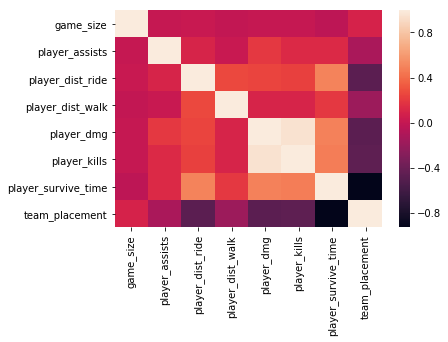

In [4]:
sns.heatmap(raw_match.corr())

C:\Users\kiyoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kiyoh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\kiyoh\Anaconda3\lib\site-packages\pandas\core\series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


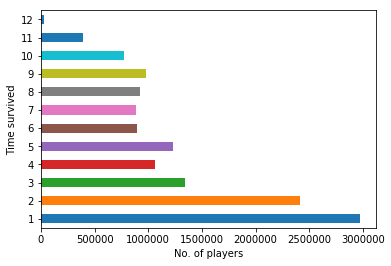

In [5]:
raw_match_time=raw_match[['player_survive_time']]
bins = [0, 180, 360, 540, 720, 900, 1080, 1260, 1440, 1620, 1800, 1980, 2160]
#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

raw_match_time['time_grouped'] = pd.cut(raw_match_time['player_survive_time'], bins=bins, labels=labels)
raw_match_time.drop(columns='player_survive_time',inplace=True)
raw_match_time['time_grouped'].dropna(inplace=True)
plt.xlabel('No. of players')
plt.ylabel('Time survived')
raw_match_time['time_grouped'].value_counts().sort_index().plot(kind='barh');
#MOST PLAYERS DIE WITHIN 3 MINS > 20%

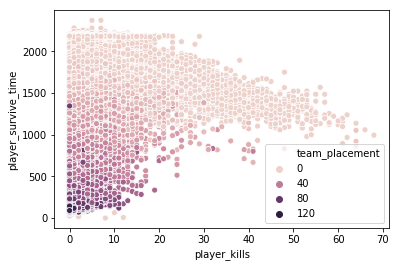

In [6]:
sns.scatterplot(x='player_kills', y="player_survive_time", hue="team_placement", data=raw_match)

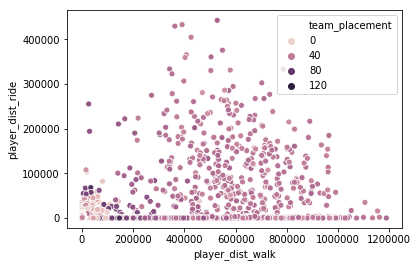

In [7]:
sns.scatterplot(x='player_dist_walk', y="player_dist_ride", hue="team_placement", data=raw_match)

In [35]:
feature_cols = ['player_assists',
                'player_dist_ride',
                'player_dist_walk',
                'player_dmg',
               ]

X = raw_match[feature_cols]
y = raw_match['team_placement']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [ ]:
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print(metrics.mean_squared_error(y_test, y_pred))


print('----------------')

from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)


mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

print('MSE list:', mse_values)
print(scores)
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

In [37]:
treereg = DecisionTreeRegressor(random_state=88)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=88, splitter='best')

In [23]:
# List of values to try:
max_depth_range = list(range(1, 10))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1) 
    MSE_scores = cross_val_score(treereg, X, y, cv=8, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

KeyboardInterrupt: 

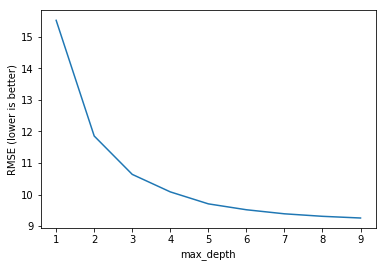

In [22]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [38]:
treereg = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=14,random_state=88)
treereg_fit = treereg.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(treereg, X, y, cv=8, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

In [39]:
dtr_scores = cross_val_score(treereg, X_train, y_train, cv=8)
print(dtr_scores)
print("mean cross validation score: {}".format(np.mean(dtr_scores)))
print("score without cv: {}".format(treereg_fit.score(X_train, y_train)))

[ 0.8644357   0.8648087   0.86466806  0.86458841  0.86494301  0.86461892
  0.86462351  0.86454783]
mean cross validation score: 0.8646542670860312
score without cv: 0.8646899878996998


In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test, treereg_fit.predict(X_test)))

0.864418964388


In [28]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,player_assists,0.000000
1,player_dist_ride,0.019935
2,player_dist_walk,0.971047
3,player_dmg,0.009018
4,player_kills,0.000000


In [41]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree.dot', feature_names=feature_cols)

#   dot -Tpng tree.dot -o tree.png